WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, nu - 2.5, Group 1 log sigma, Group 2 log sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


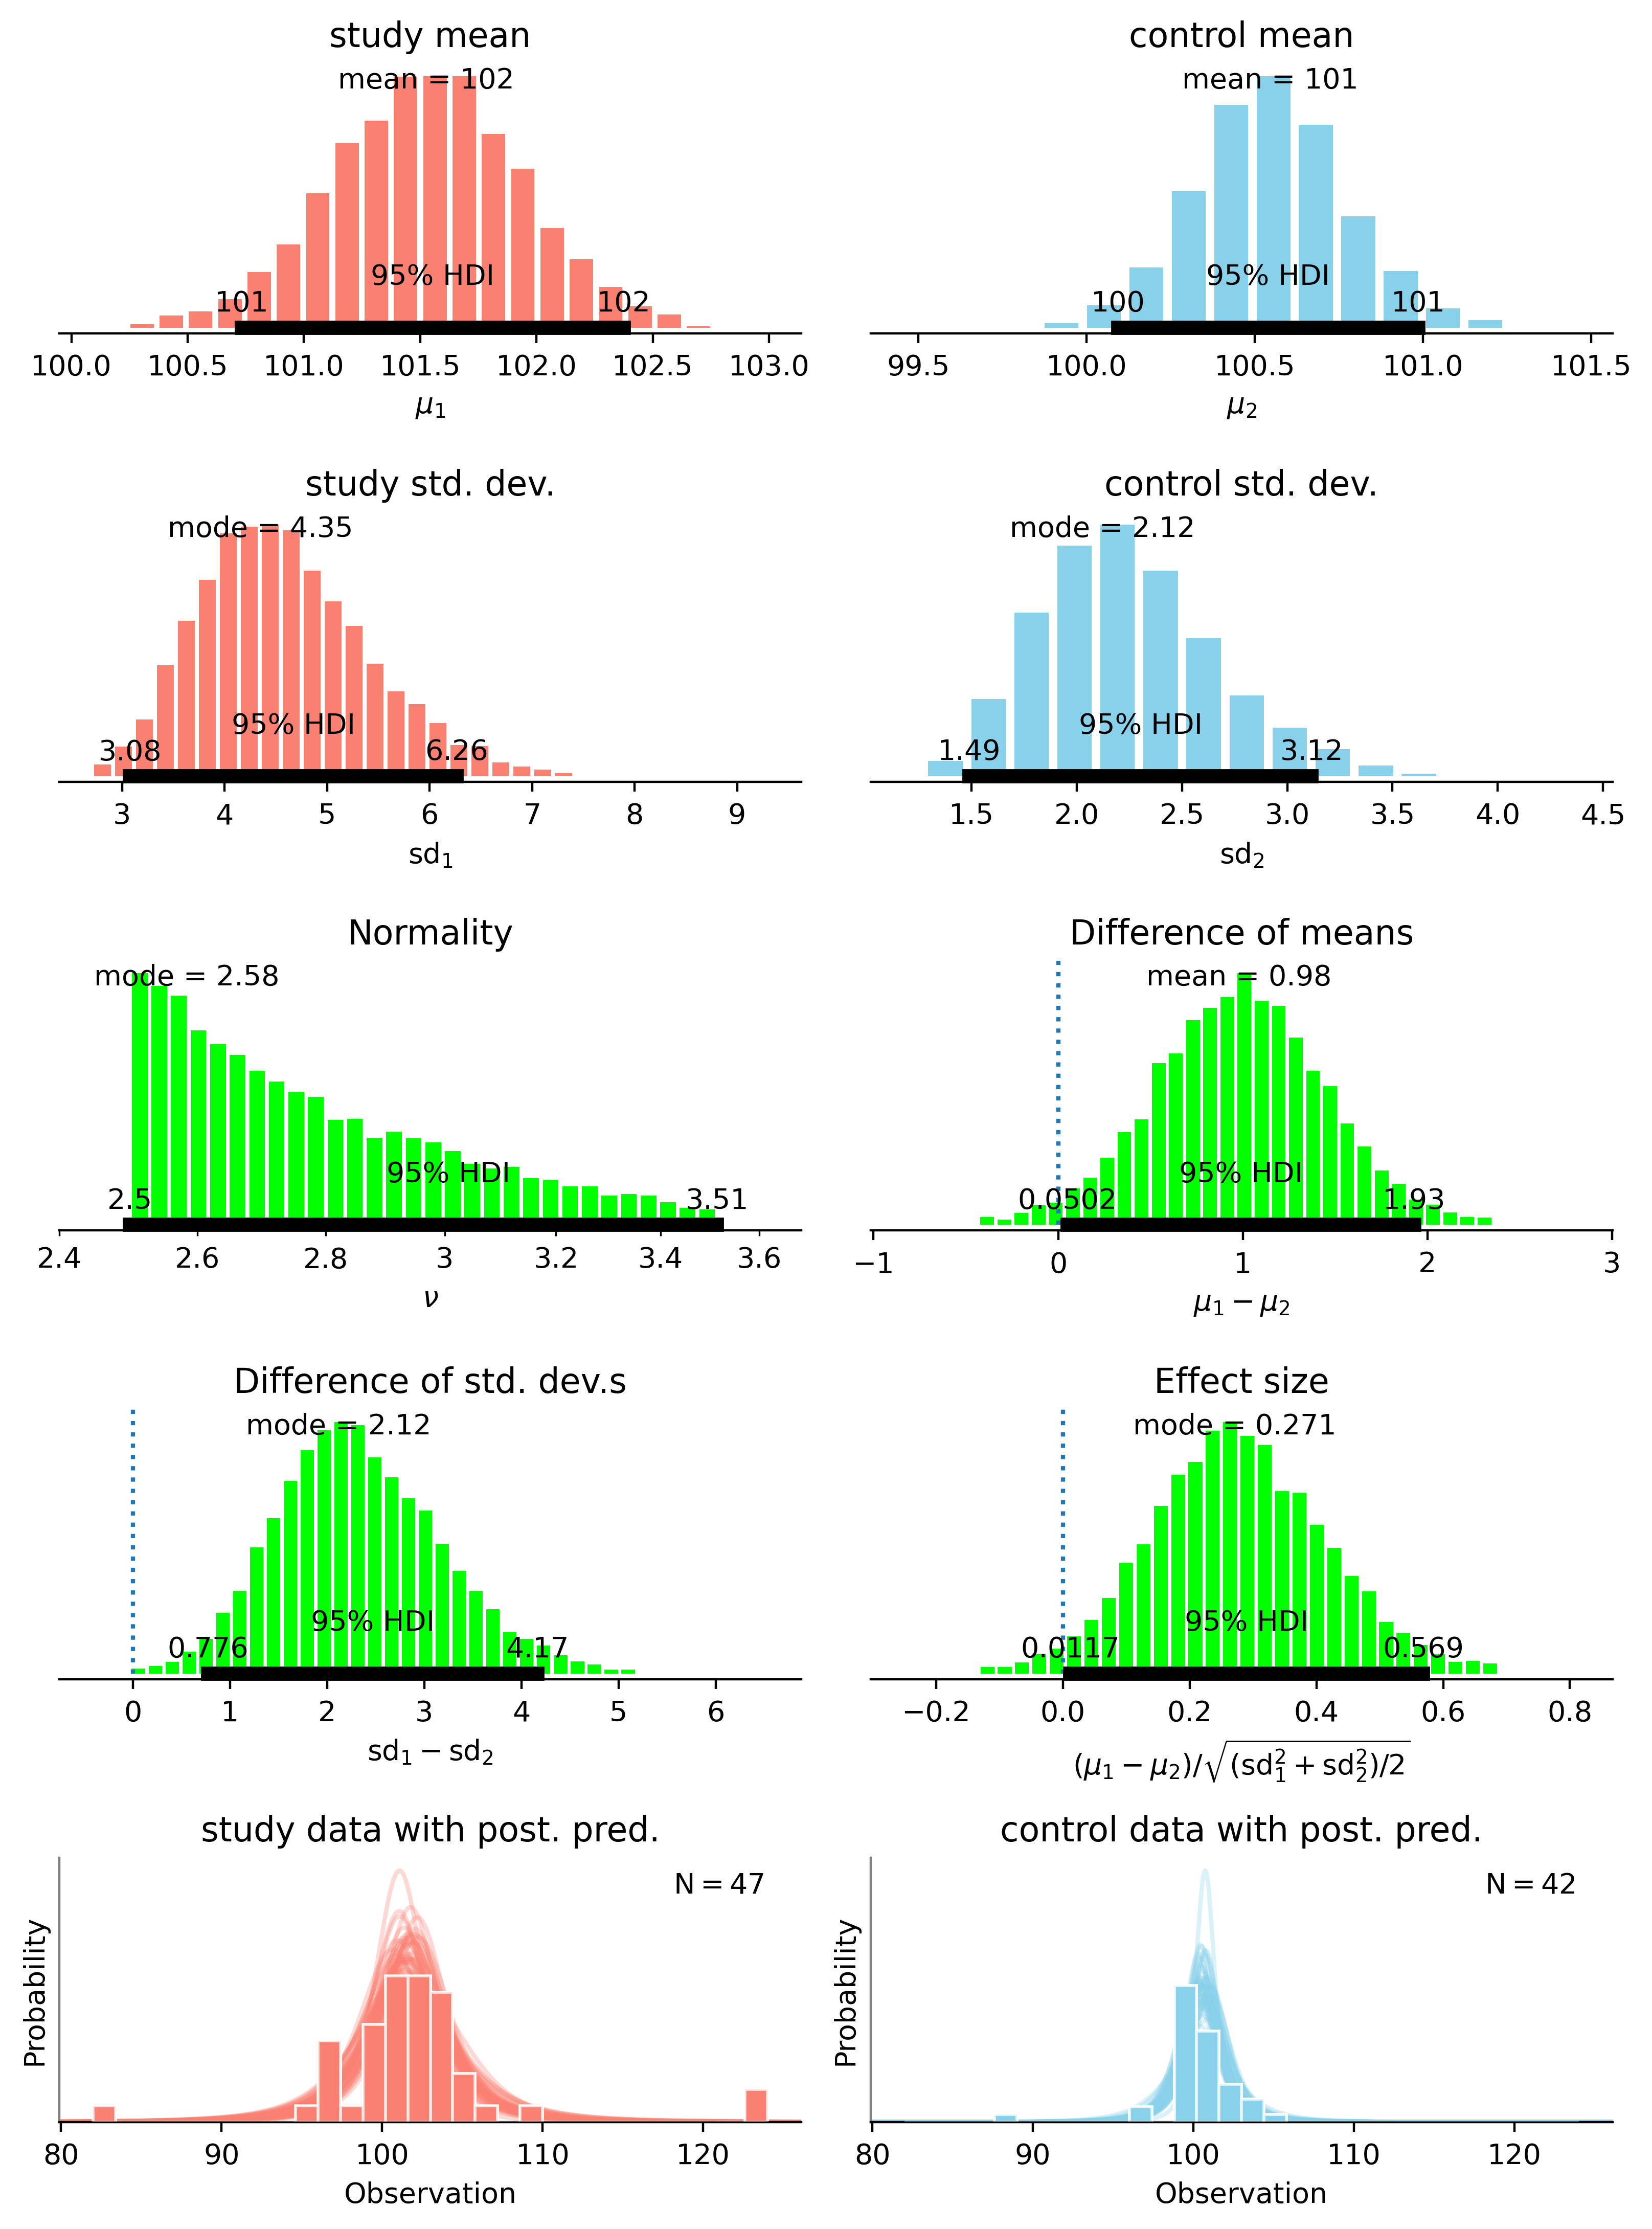

In [1]:
from bayes_test import BayesianHypothesisTestStudentT
import pandas as pd

draws = 2000

study = [101, 100, 102, 104, 102, 97, 105, 105, 98, 101, 100, 123, 105, 103,
         100, 95, 102, 106, 109, 102, 82, 102, 100, 102, 102, 101, 102, 102,
         103, 103, 97, 97, 103, 101, 97, 104, 96, 103, 124, 101, 101, 100,
         101, 101, 104, 100, 101]

# IQ scores of those who took a placebo pill
control = [99, 101, 100, 101, 102, 100, 97, 101, 104, 101, 102, 102, 100, 105,
           88, 101, 100, 104, 100, 100, 100, 101, 102, 103, 97, 101, 101, 100,
           101, 99, 101, 100, 100, 101, 100, 99, 101, 100, 102, 99, 100, 99]

df1 = pd.DataFrame({'IQ' : control})
df2 = pd.DataFrame({'IQ' : study})
df1['group'] = 'control'
df2['group'] = 'study'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestStudentT(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
study_test.value_storage

{'Group 1 mean': {'mean': 101.52582073996375,
  'hdi_min': 100.73202463007256,
  'hdi_max': 102.37627436135342},
 'Group 2 mean': {'mean': 100.54658343108268,
  'hdi_min': 100.0944806009065,
  'hdi_max': 100.98581845336987},
 'Group 1 SD': {'mode': 4.3478834710712455,
  'hdi_min': 3.0782154662226597,
  'hdi_max': 6.263116071733235},
 'Group 2 SD': {'mode': 2.123001797598546,
  'hdi_min': 1.4889585420676712,
  'hdi_max': 3.1161105101822035},
 'Normality': {'mode': 2.58338926538069,
  'hdi_min': 2.500110156662764,
  'hdi_max': 3.512548629995253},
 'Difference of means': {'mean': 0.9803063681083986,
  'hdi_min': 0.05023462820831526,
  'hdi_max': 1.9279369735032361},
 'Difference of SDs': {'mode': 2.120141763309724,
  'hdi_min': 0.7762156589548908,
  'hdi_max': 4.166132265777254},
 'Effect size': {'mode': 0.27085270522159716,
  'hdi_min': 0.011688722355655438,
  'hdi_max': 0.5685268452991878}}